# Olivia Song - CS 485 HW3

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import copy

# (a)

In [32]:
word1 = []
with open('word1.txt', encoding='utf8') as f:
    for line in f:
        word1.append(line.strip().lower())
        
counts = Counter(word1)

In [33]:
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df = df.rename(columns={'index':'word', 0:'count'})
freq = Counter(df['count'])
freq_df = pd.DataFrame.from_dict(freq, orient='index').reset_index()
freq_df = freq_df.rename(columns={'index':'word_count', 0:'occurence'})
print(freq_df)

     word_count  occurence
0             1       8968
1          1179          1
2           412          1
3          3207          1
4          2620          1
..          ...        ...
426         261          1
427         276          1
428        1357          1
429         293          1
430         171          1

[431 rows x 2 columns]


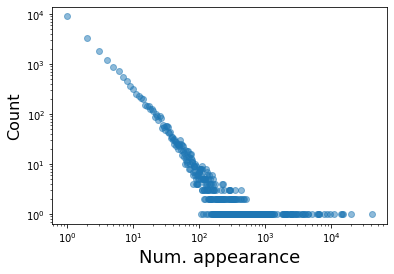

In [25]:
plt.scatter(freq_df['word_count'],freq_df['occurence'], alpha=0.5)
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Num. appearance', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.show()

In [37]:
freq_df_a1 = copy.copy(freq_df)

In [38]:
word1 = []
with open('word2.txt', encoding='utf8') as f:
    for line in f:
        word1.append(line.strip().lower())
        
counts = Counter(word1)

In [39]:
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df = df.rename(columns={'index':'word', 0:'count'})
freq = Counter(df['count'])
freq_df = pd.DataFrame.from_dict(freq, orient='index').reset_index()
freq_df = freq_df.rename(columns={'index':'word_count', 0:'occurence'})
print(freq_df)

     word_count  occurence
0            27         22
1          4798          1
2           183          4
3            55          8
4            51          4
..          ...        ...
258         193          1
259         178          1
260          93          1
261         322          1
262         300          1

[263 rows x 2 columns]


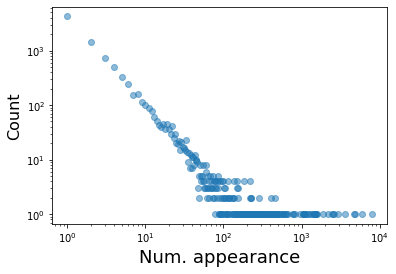

In [6]:
plt.scatter(freq_df['word_count'],freq_df['occurence'], alpha=0.5)
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Num. appearance', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.show()

In [40]:
freq_df_a2 = copy.copy(freq_df)

# (c) Histogram

In [26]:
freq_df

,word_count,occurence
0,1,8968
1,1179,1
2,412,1
3,3207,1
4,2620,1
...,...,...
426,261,1
427,276,1
428,1357,1
429,293,1


In [27]:
freq_df['word_count_rounded'] = (freq_df['word_count']+1)//2*2

In [28]:
freq_df

,word_count,occurence,word_count_rounded
0,1,8968,2
1,1179,1,1180
2,412,1,412
3,3207,1,3208
4,2620,1,2620
...,...,...,...
426,261,1,262
427,276,1,276
428,1357,1,1358
429,293,1,294


In [29]:
freq_df = freq_df[['word_count_rounded', 'occurence']].groupby(['word_count_rounded']).sum()
freq_df

,occurence
word_count_rounded,
2,12313
4,3090
6,1581
8,1022
10,696
...,...
13744,1
14378,1
14754,1


In [30]:
freq_df.reset_index(level=0, inplace=True)
freq_df

,word_count_rounded,occurence
0,2,12313
1,4,3090
2,6,1581
3,8,1022
4,10,696
...,...,...
306,13744,1
307,14378,1
308,14754,1
309,19606,1


In [31]:
freq_df[['word_count_rounded', 'occurence']].to_csv('word1_feq.csv', index=False)

# (d) CCDF

In [45]:
freq_df_a1

,word_count,occurence
0,1,8968
1,1179,1
2,412,1
3,3207,1
4,2620,1
...,...,...
426,261,1
427,276,1
428,1357,1
429,293,1


In [69]:
freq_df_a1 = freq_df_a1.sort_values(by='word_count', ascending=True, ignore_index = True)
freq_df_a1

,word_count,occurence
0,1,8968
1,2,3345
2,3,1866
3,4,1224
4,5,866
...,...,...
426,13744,1
427,14378,1
428,14754,1
429,19606,1


In [70]:
word_count = []
ccdf = []
for word_count_i in range(1,freq_df_a1.iloc[-1].loc['word_count']):
    ccdf_i = freq_df_a1[freq_df_a1['word_count']>word_count_i]['occurence'].sum()
    word_count.append(word_count_i)
    ccdf.append(ccdf_i)
    


In [71]:
ccdf_df = pd.DataFrame({'word_count':word_count,'ccdf':ccdf})
ccdf_df

,word_count,ccdf
0,1,14021
1,2,10676
2,3,8810
3,4,7586
4,5,6720
...,...,...
40504,40505,1
40505,40506,1
40506,40507,1
40507,40508,1


In [72]:
ccdf_df.to_csv('ccdf_df1.csv', index=False)

In [73]:
freq_df_a2 = freq_df_a2.sort_values(by='word_count', ascending=True, ignore_index = True)
word_count = []
ccdf = []
for word_count_i in range(1,freq_df_a2.iloc[-1].loc['word_count']):
    ccdf_i = freq_df_a2[freq_df_a2['word_count']>word_count_i]['occurence'].sum()
    word_count.append(word_count_i)
    ccdf.append(ccdf_i)
ccdf_df2 = pd.DataFrame({'word_count':word_count,'ccdf':ccdf})

In [74]:
ccdf_df2.to_csv('ccdf_df2.csv', index=False)

# (e) MLE

In [66]:
freq_df_a1

,word_count,occurence
0,1,8968
1,2,3345
2,3,1866
3,4,1224
4,5,866
...,...,...
426,13744,1
427,14378,1
428,14754,1
429,19606,1


In [77]:
import math
data = freq_df_a1
word_count = data['word_count']
n = data['occurence'].sum()
sum_ = 0
for i in range(len(data)):
    sum_ += data.iloc[i].loc['occurence']*math.log(data.iloc[i].loc['word_count'])
alpha = 1 + n/sum_
print(alpha)

1.8370806408730558


In [78]:
data = freq_df_a2
word_count = data['word_count']
n = data['occurence'].sum()
sum_ = 0
for i in range(len(data)):
    sum_ += data.iloc[i].loc['occurence']*math.log(data.iloc[i].loc['word_count'])
alpha = 1 + n/sum_
print(alpha)

2.0033864128615684
